### question1
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function
to describe this and show it graphically, the dataset given below.

Task:
1.fitting it to the periodic function
2.plot the fit 

Data 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [22]:
from scipy import optimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Min and max temperature')

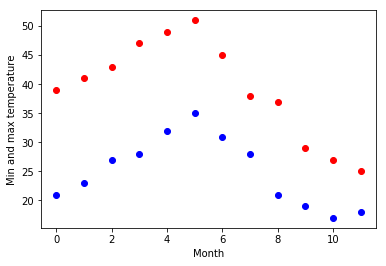

In [8]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [10]:
# fitting it to a periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

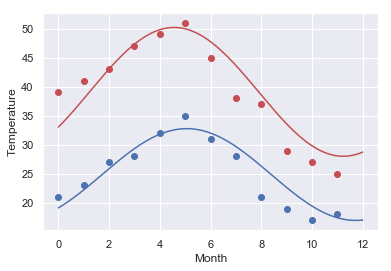

In [23]:
# plotting the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

### question2
Visualization using matplotlib

In [18]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [19]:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

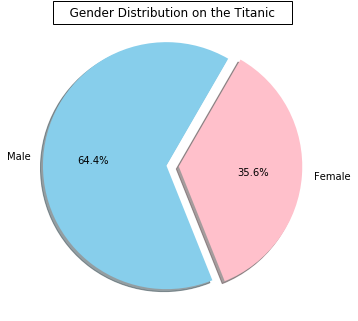

In [20]:
#Create a pie chart presenting the male/female proportion
# Gender data based on sex
gender_data = titanic['sex'].value_counts()

# Change the type float
gender_data = gender_data.astype(float)

# set chart vars
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('   Gender Distribution on the Titanic   ', 
             bbox={'facecolor':'white', 'pad':5})
labels = 'Male', 'Female'
colors = ['skyblue', 'pink']
explode = (0.1, 0)
plt.pie(gender_data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


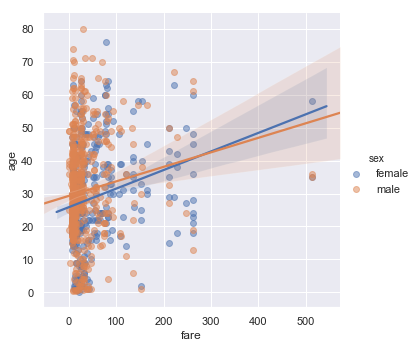

In [21]:
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
sns.set(style='darkgrid') 

sns.lmplot(x='fare', y='age', data=titanic,
           fit_reg=True, # Show regression line
           hue='sex',    # Color by gender
           scatter_kws={'alpha':0.5}) 